#### **EDA (Exploración y Analisis de los Datos)**
**Se inicializa el proceso con la importación de los archivos procesados y almacenados en formato parquet resultantes del ETL**

Revisiones previas a los dataframe:
- Dimensiones y tipos de datos: Se ha validado las dimensiones de cada dataframe y los tipos de datos allí contenidos.
        •   Los dataframe del proyecto tienen dataframes que van desde las 43 hsta las 18884 filas y de las 5 a las 25 columnas
        •   Los dos dataframe mas grandes, con dimensiones de 43x25 y 1032x21, tienen campos con 1 nulo y de 24 a 32 nulos respectivamete, su impacto es inferior al 1% en el primer caso por lo cual no se le realiza imputación alguna, en el caso del segunda dataframe donde el impacto llegaría maximo al  3,1% de su cantidad de datos por campo entonces se le realiza imputacion a su media aritmetica ya que obedece a campos realacionados con accesos y velocidades de internet.
	    •	La revision de los tipos de valores de cada campo ya se habia realizado en el ETL sin embargo se corrobora Revisar los tipos de datos (numéricos, categóricos, fechas, booleanos, etc.) para confirmar que estén alineados con lo esperado tras el ETL.

    | Campo                            | Tipo de Dato | Tipo Variable        | Descripción                                          |
    |----------------------------------|--------------|----------------------|------------------------------------------------------|
    | Año                              | Int64        | Numérica discreta    | Año en formato entero (ej. 2019)                     |
    | Trimestre                        | Int64        | Numérica discreta    | Trimestre del año (1, 2, 3, 4)                       |
    | Provincia                        | category     | Categórica nominal   | Nombre de la Provincia                               |
    | "campos asociados a velocidades" | float64      | Numérica continua    | Velocidad promedio de bajada en Mbps                 |
    | "Campos asociados a accesos"     | float64      | Numérica continua    | Cantidad de accesos a Internet                       |
    | Periodo                          | category     | Categórica ordinal   | Trimestre representado en Año y meses comprendidos   |
    | Ingresos                         | float64      | Numérica continua    | Dinero generado en Ingresos                          |      

- Valores nulos y duplicados: Se descarta duplicidad en los datos Categoricos de las Provincias, en el caso de los datos nulos son pocas las ocurrencias por lo cual para el EDA no impactaría o afectaria el analisis.

In [1]:
import pandas as pd
from functions import *
opciones_impresion() # Invocar la función para mejorar la impresion y que no se recorte la información al imprimir.

# Se inicializa el proceso con la importación de los archivos parquet resultantes del ETL:
df_internet_nacional = pd.read_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data/processed/df_internet_nacional.parquet')
df_internet_provincias = pd.read_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data/processed/df_internet_provincias.parquet')
df_internet_Acc_vel_loc_sinrangos = pd.read_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data/processed/df_internet_Acc_vel_loc_sinrangos.parquet')
df_internet_Velocidad_sin_Rangos = pd.read_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data/processed/df_internet_Velocidad_sin_Rangos.parquet')
df_internet_Dial_BAf = pd.read_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data/processed/df_internet_Dial_BAf.parquet')

- Validamos el dataframe "df_internet_nacional"  

In [2]:
# Revisamos información descriptiva y tipos de datos del dataframe df_internet_nacional:
print("El dataframe {} tiene una dimensión de: {}".format("df_internet_nacional", df_internet_nacional.shape),"\n",validar_df(df_internet_nacional),"\n", df_internet_nacional.head(4),"\n", df_internet_nacional.tail(4),"\n")

El dataframe df_internet_nacional tiene una dimensión de: (42, 25) 
                             Tipo de Dato Int Int64 Float Bool DateT Str Ctgory Nulos No_Nulos Únicos Ceros Vacíos (string) Skewness  Kurtosis   Media            Desviación_Std   Moda           Mínimo         Q1_25%          Q2_50%           Q3_75%           Máximo        Negativos
Año                             int64     42  0      0    0    0      0  NaN    0     42       11       0   NaN             0.024172  -1.186795      2018.761905         3.074756           2014           2014          2016.0           2019.0           2021.0          2024    0     
Trimestre                       int64     42  0      0    0    0      0  NaN    0     42        4       0   NaN             0.070729  -1.371727         2.452381          1.13056              1              1            1.25              2.0              3.0             4    0     
Tot_Vel_Media_DL              float64      0  0     42    0    0      0  NaN    0    

- Validamos el dataframe "df_internet_provincias

In [ ]:
# Revisamos información descriptiva y tipos de datos del dataframe df_internet_provincias:
print("El dataframe {} tiene una dimensión de: {}".format("df_internet_provincias", df_internet_provincias.shape),"\n",validar_df(df_internet_provincias),"\n", df_internet_provincias.head(4),"\n", df_internet_provincias.tail(4),"\n")


El dataframe df_internet_provincias tiene una dimensión de: (1032, 21) 
                                    Tipo de Dato Int   Int64 Float Bool DateT Str   Ctgory No_Nulos Nulos Únicos Ceros Vacíos (string) Media          Desviación_Std Mínimo    Q1_25%     Q2_50%     Q3_75%     Máximo      Negativos
Año                                    int64     1032  0        0  0    0        0   NaN   1032      0      11     0   NaN               2018.883721        3.10596      2014     2016.0     2019.0     2022.0        2024    0     
Trimestre                              int64     1032  0        0  0    0        0   NaN   1032      0       4     0   NaN                  2.488372       1.128874         1        1.0        2.0        4.0           4    0     
Provincia                           category        0  0        0  0    0     1032  1032   1032      0      24   NaN     0                       NaN            NaN       NaN        NaN        NaN        NaN         NaN  NaN     
Tot_Vel_Med

- Validamos el dataframe "df_internet_Acc_vel_loc_sinrangos

In [ ]:
# Revisamos información descriptiva y tipos de datos del dataframe df_internet_Acc_vel_loc_sinrangos:
print("El dataframe {} tiene una dimensión de: {}".format("df_internet_Acc_vel_loc_sinrangos", df_internet_Acc_vel_loc_sinrangos.shape),"\n",validar_df(df_internet_Acc_vel_loc_sinrangos),"\n", df_internet_Acc_vel_loc_sinrangos.head(4),"\n", df_internet_Acc_vel_loc_sinrangos.tail(4),"\n")


El dataframe df_internet_Acc_vel_loc_sinrangos tiene una dimensión de: (18864, 6) 
                  Tipo de Dato Int Int64 Float  Bool DateT Str    Ctgory No_Nulos Nulos Únicos Ceros Vacíos (string) Media            Desviación_Std   Mínimo     Q1_25%     Q2_50%      Q3_75%      Máximo      Negativos
Provincia         category     0   0         0  0    0     18864  18864  18864    0       24   NaN     0                         NaN              NaN        NaN        NaN         NaN         NaN         NaN  NaN     
Localidad         category     0   0         0  0    0     18864  18864  18864    0      432   NaN     0                         NaN              NaN        NaN        NaN         NaN         NaN         NaN  NaN     
link Indec        category     0   0         0  0    0     18864  18864  18864    0     2773   NaN     0                         NaN              NaN        NaN        NaN         NaN         NaN         NaN  NaN     
Velocidad (Mbps)   float64     0   0     188

- Validamos el dataframe "df_internet_Velocidad_sin_Rangos"

In [ ]:
# Revisamos información descriptiva y tipos de datos del dataframe 
print("El dataframe {} tiene una dimensión de: {}".format("df_internet_Velocidad_sin_Rangos", df_internet_Velocidad_sin_Rangos.shape),"\n",validar_df(df_internet_Velocidad_sin_Rangos),"\n", df_internet_Velocidad_sin_Rangos.head(4),"\n", df_internet_Velocidad_sin_Rangos.tail(4),"\n")

El dataframe df_internet_Velocidad_sin_Rangos tiene una dimensión de: (18884, 5) 
           Tipo de Dato Int    Int64 Float  Bool DateT Str    Ctgory No_Nulos Nulos Únicos Ceros Vacíos (string) Media         Desviación_Std Mínimo Q1_25%  Q2_50%  Q3_75%  Máximo   Negativos
Año           int64     18884  0         0  0    0         0    NaN  18884    0        8     0   NaN              2021.017104       1.91974   2017   2019.0  2021.0  2023.0     2024    0     
Trimestre     int64     18884  0         0  0    0         0    NaN  18884    0        4     0   NaN                 2.477653      1.126947      1      1.0     2.0     4.0        4    0     
Provincia  category         0  0         0  0    0     18884  18884  18884    0       24   NaN     0                      NaN           NaN    NaN      NaN     NaN     NaN      NaN  NaN     
Velocidad   float64         0  0     18884  0    0         0    NaN  18884    0      191    24   NaN                96.171156    379.622345    0.0      4

- Validamos el dataframe "df_internet_Dial_BAf"

In [ ]:
# Revisamos información descriptiva y tipos de datos del dataframe 
print("El dataframe {} tiene una dimensión de: {}".format("df_internet_Dial_BAf", df_internet_Dial_BAf.shape),"\n",validar_df(df_internet_Dial_BAf),"\n", df_internet_Dial_BAf.head(4),"\n", df_internet_Dial_BAf.tail(4),"\n")


El dataframe df_internet_Dial_BAf tiene una dimensión de: (1992, 6) 
                                  Tipo de Dato Int   Int64 Float Bool DateT Str   Ctgory No_Nulos Nulos Únicos Ceros Vacíos (string) Media          Desviación_Std Mínimo Q1_25%   Q2_50%    Q3_75%    Máximo   Negativos
Año                                  int64     1992  0        0  0    0        0   NaN   1992     0       11     0   NaN               2018.698795       3.001697   2014   2016.0    2019.0    2021.0     2024    0     
Trimestre                            int64     1992  0        0  0    0        0   NaN   1992     0        4     0   NaN                  2.457831       1.122899      1      1.0       2.0       3.0        4    0     
Provincia                         category        0  0        0  0    0     1992  1992   1992     0       24   NaN     0                       NaN            NaN    NaN      NaN       NaN       NaN      NaN  NaN     
Tot_B_Ancha_Fija_x_Prov              int64     1992  0        

1. Graficamos a lo largo del tiempo (Año, Trimestre) a Tot_Vel_Media_DL Vs. Tecnología (Tot_Acc_ADSL, Tot_Acc_CaModem, Tot_Acc_FO, Tot_Acc_Wireless, Tot_Acc_Otros)
2. Graficamos a lo largo del tiempo (Año, Trimestre) a Tot_pntrcion_x_c100_Hoga Vs. Tecnología (Tot_Acc_ADSL, Tot_Acc_CaModem, Tot_Acc_FO, Tot_Acc_Wireless, Tot_Acc_Otros)
3. Graficamos a lo largo del tiempo (Año, Trimestre) a Tot_pntrcion_x_c100_Habi Vs. Tecnología (Tot_Acc_ADSL, Tot_Acc_CaModem, Tot_Acc_FO, Tot_Acc_Wireless, Tot_Acc_Otros)

4. Graficamos a lo largo del tiempo (Año, Trimestre) a Tot_pntrcion_x_c100_Hoga Vs. Accesos según velocidades (Tot_Acc_rango_0_512_kbps, Tot_Acc_rango_0.512->1_Mbps, Tot_Acc_rango_1->6_Mbps, Tot_Acc_rango_6->10_Mbps, Tot_Acc_rango_10->20_Mbps, Tot_Acc_rango_20->30_Mbps, Tot_Acc_rango_>30_Mbps, Tot_Acc_rango_Otros, Tot_Acc_rango)
5. Graficamos a lo largo del tiempo (Año, Trimestre) a Tot_pntrcion_x_c100_Habi Vs. Accesos según velocidades (Tot_Acc_rango_0_512_kbps, Tot_Acc_rango_0.512->1_Mbps, Tot_Acc_rango_1->6_Mbps, Tot_Acc_rango_6->10_Mbps, Tot_Acc_rango_10->20_Mbps, Tot_Acc_rango_20->30_Mbps, Tot_Acc_rango_>30_Mbps, Tot_Acc_rango_Otros, Tot_Acc_rango)

Evolucion de la Rentabilidad respecto a......
6. Graficamos a lo largo del tiempo (Año, Trimestre) a ARPU x Tecnología (Ingresos / Accesos x Tecnología) Vs. Tot_pntrcion_x_c100_Hoga
6. Graficamos a lo largo del tiempo (Año, Trimestre) a ARPU x Tecnología (Ingresos / Accesos x Tecnología) Vs. Tot_pntrcion_x_c100_Habi
6. Graficamos a lo largo del tiempo (Año, Trimestre) a ARPU x Tecnología (Ingresos / Accesos x Tecnología) Vs. Accesos según velocidades (Tot_Acc_rango_0_512_kbps, Tot_Acc_rango_0.512->1_Mbps, Tot_Acc_rango_1->6_Mbps, Tot_Acc_rango_6->10_Mbps, Tot_Acc_rango_10->20_Mbps, Tot_Acc_rango_20->30_Mbps, Tot_Acc_rango_>30_Mbps, Tot_Acc_rango_Otros, Tot_Acc_rango)

Tasa de Crecimiento de Accesos
10. Graficamos a lo largo del tiempo (Año, Trimestre) a Tasa Crecimiento Acceso Vs. Tot_Acc_rangos de velocidades
11. Graficamos a lo largo del tiempo (Año, Trimestre) a Tasa Crecimiento Acceso Vs. (Tot_B_Ancha_Fija, Tot_DialUp, Tot_DialUp_+_B_Ancha_Fija)
12. Graficamos a lo largo del tiempo (Año, Trimestre) a Tasa Crecimiento Acceso Vs. Accesos x tecnología

INgresos por rangos de velocidad y por tecnologias
13. Graficamos a lo largo del tiempo (Año, Trimestre) a Ingresos (miles de pesos)  Vs. Tecnología (Tot_Acc_ADSL, Tot_Acc_CaModem, Tot_Acc_FO, Tot_Acc_Wireless, Tot_Acc_Otros)
14. Graficamos a lo largo del tiempo (Año, Trimestre) a Ingresos (miles de pesos)  Vs. Accesos según velocidades (Tot_Acc_rango_0_512_kbps, Tot_Acc_rango_0.512->1_Mbps, Tot_Acc_rango_1->6_Mbps, Tot_Acc_rango_6->10_Mbps, Tot_Acc_rango_10->20_Mbps, Tot_Acc_rango_20->30_Mbps, Tot_Acc_rango_>30_Mbps, Tot_Acc_rango_Otros, Tot_Acc_rango)

calidad de experiencia
Graficamos a lo largo del tiempo (Año, Trimestre) a Tot_Vel_Media_DL Vs 

- Se imputan los datos nulos de los campos "Tot_Vel_Media_DL_Trim_x_Prov, Tot_Acc_ADSL_x_Prov, Tot_Acc_CaModem_x_Prov, Tot_Acc_FO_x_Prov, Tot_Acc_Wireless_x_Prov, Tot_Acc_Otros_x_Prov, Tot_Acc_x_Prov, Tot_pntrcion_x_c100_Habi_x_Prov, Tot_pntrcion_x_c100_Hoga_x_Prov, Tot_Acc_rango_0->512_kbps_x_Prov, Tot_Acc_rango_0.512->1_Mbps_x_Prov, Tot_Acc_rango_1->6_Mbps_x_Prov, Tot_Acc_rango_6->10_Mbps_x_Prov, Tot_Acc_rango_10->20_Mbps_x_Prov, Tot_Acc_rango_20->30_Mbps_x_Prov, Tot_Acc_rango_>30_Mbps_x_Prov, Tot_Acc_rango_Otros_Mbps_x_Prov, Tot_Acc_rango_Mbps_x_Prov" en el dataframe "df_internet_provincias" a su media aritmetica respectivamente:

In [ ]:
# Se imputan los datos nulos de los campos "Tot_Vel_Media_DL_Trim_x_Prov", "Tot_Acc_ADSL_x_Prov", 
# "Tot_Acc_CaModem_x_Prov", "Tot_Acc_FO_x_Prov", "Tot_Acc_Wireless_x_Prov", "Tot_Acc_Otros_x_Prov", 
# "Tot_Acc_x_Prov", "Tot_pntrcion_x_c100_Habi_x_Prov", "Tot_pntrcion_x_c100_Hoga_x_Prov", 
# "Tot_Acc_rango_0->512_kbps_x_Prov", "Tot_Acc_rango_0.512->1_Mbps_x_Prov", "Tot_Acc_rango_1->6_Mbps_x_Prov", 
# "Tot_Acc_rango_6->10_Mbps_x_Prov", "Tot_Acc_rango_10->20_Mbps_x_Prov", "Tot_Acc_rango_20->30_Mbps_x_Prov", 
# "Tot_Acc_rango_>30_Mbps_x_Prov", "Tot_Acc_rango_Otros_Mbps_x_Prov", "Tot_Acc_rango_Mbps_x_Prov" 
# en el dataframe "df_internet_provincias" a su media aritmetica respectivamente:

campos_a_imputar = [
    "Tot_Vel_Media_DL_Trim_x_Prov",
    "Tot_Acc_ADSL_x_Prov",
    "Tot_Acc_CaModem_x_Prov",
    "Tot_Acc_FO_x_Prov",
    "Tot_Acc_Wireless_x_Prov",
    "Tot_Acc_Otros_x_Prov",
    "Tot_Acc_x_Prov",
    "Tot_pntrcion_x_c100_Habi_x_Prov",
    "Tot_pntrcion_x_c100_Hoga_x_Prov",
    "Tot_Acc_rango_0->512_kbps_x_Prov",
    "Tot_Acc_rango_0.512->1_Mbps_x_Prov",
    "Tot_Acc_rango_1->6_Mbps_x_Prov",
    "Tot_Acc_rango_6->10_Mbps_x_Prov",
    "Tot_Acc_rango_10->20_Mbps_x_Prov",
    "Tot_Acc_rango_20->30_Mbps_x_Prov",
    "Tot_Acc_rango_>30_Mbps_x_Prov",
    "Tot_Acc_rango_Otros_Mbps_x_Prov",
    "Tot_Acc_rango_Mbps_x_Prov"
]

df_internet_provincias = imputar_media(df_internet_provincias, campos_a_imputar)
print(validar_df(df_internet_provincias))

Tras la depuración de los datos proseguimos con la revisión en detalle del cotenido a nivel de datos y lo que representan para el analisis:

1. Revisión y limpieza de valores atípicos:
	-	Se identifican valores negativos en 4 datos del campo "Accesos" los cuales se imputan a valores positivos asumiendo pudo ser un error de digitación o carga, y considerando no se darian accesos negativos ya que eso obedeceria es a otro tipo de indicador asociado a bajas o shurn.

In [20]:
import time
# Imputamos los valores negativos en el campos "Accesos" del dataframe "df_internet_Acc_vel_loc_sinrangos" los cuales seran reemplazados por su valor absoluto:
valores_negativos = df_internet_Acc_vel_loc_sinrangos["Accesos"][df_internet_Acc_vel_loc_sinrangos["Accesos"] < 0]
print("Valores negativos en 'Accesos':")
print(valores_negativos)
df_internet_Acc_vel_loc_sinrangos.loc[df_internet_Acc_vel_loc_sinrangos["Accesos"] < 0, "Accesos"] = df_internet_Acc_vel_loc_sinrangos["Accesos"].abs() # Reemplazamos por su valor absoluto.

Valores negativos en 'Accesos':
7172    -5582.0
7226     -590.0
10597    -830.0
12699      -1.0
Name: Accesos, dtype: float64


1. **Análisis de Series Temporales:**  
   	- Graficamos la evolución de variables clave como:
		- Velocidad a lo largo del tiempo, usando "Año" y "Trimestre".  
		- Accesos a lo largo del tiempo, usando "Año" y "Trimestre".
		- Penetración a lo largo del tiempo, usando "Año" y "Trimestre".
		- Tecnologías a lo largo del tiempo, usando "Año" y "Trimestre"

   	- Identificar tendencias, estacionalidad o cambios abruptos en el tiempo.
   	- Graficar la relación directa entre la velocidad y los accesos
	- Graficar la relación directa entre la velocidad y la penetración por provincia
	- Obtener la matriz de correlaciones

ayudame con los gráficos de la siguiente forma:

crea una figura con tres subplots dividio en dos cada uno (matriz 3 x 2) para "Análisis por Tecnologías" de tal forma que los graficos contengan a lo largo del tiempo y con escalas independientes cuando sea necesario (derecha e izquierda):
Primera fila:
- Evolucion Accesos por tecnología
- Evolucion Ingresos por tecnolgía
Segunda Fila:
- Evolucion Penetracion Tecnologia por cada 100 Hogares 
- Evolucion Penetracion Tecnolgia por cada 100 habitantes
Tercera fila:
- Evolucion 


In [6]:
# Creamos la columna "Fecha" en el DataFrame "df_internet_nacional" para su uso en los graficos de series temporales:
df_internet_nacional = crear_fecha_trimestral_df(df_internet_nacional,"Año","Trimestre")
print(df_internet_nacional.head(4))
print(df_internet_nacional.tail(4))

# Creamos la columna "Fecha" en el DataFrame "df_internet_provincias" para su uso en los graficos de series temporales:
df_internet_provincias = crear_fecha_trimestral_df(df_internet_provincias,"Año","Trimestre")
print(df_internet_provincias.head(4))
print(df_internet_provincias.tail(4))

# Creamos la columna "Fecha" en el DataFrame "df_internet_Velocidad_sin_Rangos" para su uso en los graficos de series temporales:
df_internet_Velocidad_sin_Rangos = crear_fecha_trimestral_df(df_internet_Velocidad_sin_Rangos,"Año","Trimestre")
print(df_internet_Velocidad_sin_Rangos.head(4))
print(df_internet_Velocidad_sin_Rangos.tail(4))

# Creamos la columna "Fecha" en el DataFrame "df_internet_Dial_BAf" para su uso en los graficos de series temporales:
df_internet_Dial_BAf = crear_fecha_trimestral_df(df_internet_Dial_BAf,"Año","Trimestre")
print(df_internet_Dial_BAf.head(4))
print(df_internet_Dial_BAf.tail(4))

  Fecha       Año   Trimestre  Tot_Vel_Media_DL  Tot_Acc_ADSL  Tot_Acc_CaModem  Tot_Acc_FO  Tot_Acc_Wireless  Tot_Acc_Otros  Total   Periodo         Tot_pntrcion_x_c100_Hoga  Tot_pntrcion_x_c100_Habi  Tot_Acc_rango_0_512_kbps  Tot_Acc_rango_0.512->1_Mbps  Tot_Acc_rango_1->6_Mbps  Tot_Acc_rango_6->10_Mbps  Tot_Acc_rango_10->20_Mbps  Tot_Acc_rango_20->30_Mbps  Tot_Acc_rango_>30_Mbps  Tot_Acc_rango_Otros  Tot_Acc_rango  Tot_B_Ancha_Fija  Tot_DialUp  Tot_DialUp_+_B_Ancha_Fija  Ingresos (miles de pesos)
0 2014-01-01  2014  1          3.617127          3697066       2407330          150323      70749             72930          6398398   Ene-Mar 2014  49.545821                 15.050104                 52684                     687619                       5130294                  289182                    101127                      345                       11595                   0                    6272846        6362108           36290       6398398                    2.984054e+06      

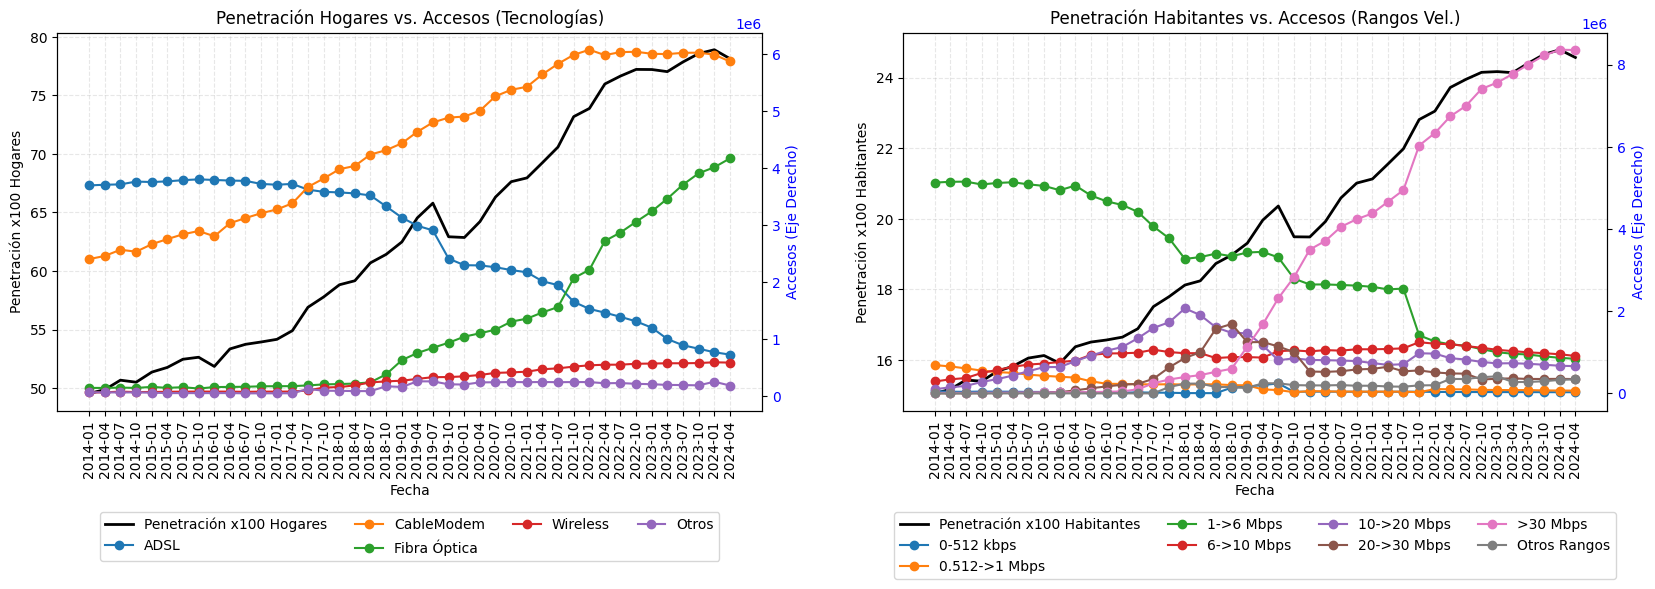

In [ ]:
# --------------------------------------------------------------------
#               EJEMPLO DE USO CON 2 SUBPLOTS
# --------------------------------------------------------------------

# 1. Suponiendo que ya tienes un DataFrame con la columna "Fecha" de tipo datetime
df = df_internet_nacional_fecha.copy()

# Listas de columnas y etiquetas para tecnologías
tecnologias_cols = [
    "Tot_Acc_ADSL",
    "Tot_Acc_CaModem",
    "Tot_Acc_FO",
    "Tot_Acc_Wireless",
    "Tot_Acc_Otros"
]
tecnologias_labels = ["ADSL", "CableModem", "Fibra Óptica", "Wireless", "Otros"]

# Listas de columnas y etiquetas para rangos de velocidad
rangos_cols = [
    "Tot_Acc_rango_0_512_kbps",
    "Tot_Acc_rango_0.512->1_Mbps",
    "Tot_Acc_rango_1->6_Mbps",
    "Tot_Acc_rango_6->10_Mbps",
    "Tot_Acc_rango_10->20_Mbps",
    "Tot_Acc_rango_20->30_Mbps",
    "Tot_Acc_rango_>30_Mbps",
    "Tot_Acc_rango_Otros"
]
rangos_labels = [
    "0-512 kbps", 
    "0.512->1 Mbps", 
    "1->6 Mbps", 
    "6->10 Mbps", 
    "10->20 Mbps",
    "20->30 Mbps", 
    ">30 Mbps", 
    "Otros Rangos"
]

# Crear figura con 1 fila y 2 columnas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# SUBPLOT 1: Penetración Hogares vs. Accesos (Tecnologías)
graficar_eje_gemelo(
    eje=ax1,
    df=df,
    col_x="Fecha",
    col_izq="Tot_pntrcion_x_c100_Hoga",
    label_izq="Penetración x100 Hogares",
    cols_der=tecnologias_cols,
    labels_der=tecnologias_labels,
    titulo="Penetración Hogares vs. Accesos (Tecnologías)",
    ncol_leyenda=4,  # Ajusta para la cantidad de líneas
    rotar_x=90       # Rotación de las etiquetas del eje X
)

# SUBPLOT 2: Penetración Habitantes vs. Accesos (Rangos Vel.)
graficar_eje_gemelo(
    eje=ax2,
    df=df,
    col_x="Fecha",
    col_izq="Tot_pntrcion_x_c100_Habi",
    label_izq="Penetración x100 Habitantes",
    cols_der=rangos_cols,
    labels_der=rangos_labels,
    titulo="Penetración Habitantes vs. Accesos (Rangos Vel.)",
    ncol_leyenda=4,
    rotar_x=90
)

# Ajustar márgenes inferiores para que las leyendas no se corten
plt.subplots_adjust(bottom=0.25)

plt.show()

In [3]:
'''import pandas as pd
import matplotlib.pyplot as plt

# Una vez tenemos creado el campo "Fecha" en los dataframe y ordenado cronológicamente procedemos a graficar.
df_internet_nacional_fecha = df_internet_nacional.copy()

############################################################################################################
fig, ax1 = plt.subplots(figsize=(12, 6)) # Creamos la figura y el primer eje

# Configuramos el primer eje (izquierdo) para Velocidad Media DL
color1 = 'tab:blue'
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Velocidad Media DL (Mbps)", color=color1)
ax1.plot(df_internet_nacional_fecha["Fecha"], 
         df_internet_nacional_fecha["Tot_Vel_Media_DL"], 
         marker='o', color=color1, label="Velocidad Media DL (Mbps)")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, which='both', linestyle='--', alpha=0.5)

# Creamos el segundo eje (derecho) para Total de Accesos en millones de usuarios
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel("Total de Accesos (millones de usuarios)", color=color2)
ax2.plot(df_internet_nacional_fecha["Fecha"], 
         df_internet_nacional_fecha["Total"] / 1e6, 
         marker='s', color=color2, label="Total de Accesos (millones)")
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("Evolución de Velocidad y Accesos a lo largo del tiempo")
fig.tight_layout()
plt.show()
############################################################################################################

import matplotlib.pyplot as plt

# Definir la lista de tecnologías
tecnologias = ["Tot_Acc_ADSL", "Tot_Acc_CaModem", "Tot_Acc_FO", "Tot_Acc_Wireless", "Tot_Acc_Otros"]

# Asumimos que df_internet_nacional_fecha es el DataFrame ya preparado con la columna 'Fecha'
df = df_internet_nacional_fecha.copy()

# Calcular el ARPU para cada tecnología: ARPU_{tech} = Ingresos (miles de pesos) / [accesos para esa tecnología]
for tech in tecnologias:
    df[f"ARPU_{tech}"] = df["Ingresos (miles de pesos)"] / df[tech]

# Creamos la figura y el primer eje para graficar el ARPU de cada tecnología
fig, ax1 = plt.subplots(figsize=(12,6))
color_palette = plt.cm.tab10.colors  # Paleta de colores para las líneas

for i, tech in enumerate(tecnologias):
    ax1.plot(df["Fecha"], df[f"ARPU_{tech}"],
             marker='o', color=color_palette[i],
             label=f"ARPU {tech}")

ax1.set_xlabel("Fecha")
ax1.set_ylabel("ARPU (miles de pesos por acceso)", color="black")
ax1.tick_params(axis='y', labelcolor="black")
ax1.grid(True, which='both', linestyle='--', alpha=0.5)

# Creamos un segundo eje para graficar la penetración en hogares
ax2 = ax1.twinx()
ax2.plot(df["Fecha"], df["Tot_pntrcion_x_c100_Hoga"],
         marker='s', color='black', linestyle='--',
         label="Penetración Hogares")
ax2.set_ylabel("Penetración en Hogares", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combinar leyendas de ambos ejes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title("Evolución de ARPU por Tecnología vs. Penetración en Hogares")
fig.tight_layout()
plt.show()

############################################################################################################

# Ejemplo 2: Evolución de Accesos por Tecnología
# Variables de accesos por tecnología: ADSL, CaModem, FO, Wireless, Otros
tecnologias = ["Tot_Acc_ADSL", "Tot_Acc_CaModem", "Tot_Acc_FO", "Tot_Acc_Wireless", "Tot_Acc_Otros"]
plt.figure(figsize=(12,6))
for tech in tecnologias:
    if tech in df_internet_nacional_fecha.columns:
        plt.plot(df_internet_nacional_fecha["Fecha"], df_internet_nacional_fecha[tech], marker='o', label=tech)
plt.title("Evolución de Accesos por Tecnología")
plt.xlabel("Fecha")
plt.ylabel("Accesos")
plt.legend()
plt.grid(True)
plt.show()

############################################################################################################
import matplotlib.pyplot as plt

# Definir la lista de tecnologías
tecnologias = ["Tot_Acc_ADSL", "Tot_Acc_CaModem", "Tot_Acc_FO", "Tot_Acc_Wireless", "Tot_Acc_Otros"]

# Calcular ARPU_Tec: Ingresos (miles de pesos) dividido entre la suma de accesos por tecnología.
if "Ingresos (miles de pesos)" in df_internet_nacional_fecha.columns:
    df_internet_nacional_fecha["ARPU_Tec"] = df_internet_nacional_fecha["Ingresos (miles de pesos)"] / \
        df_internet_nacional_fecha[tecnologias].sum(axis=1)

    # Crear la figura y el primer eje para ARPU_Tec
    fig, ax1 = plt.subplots(figsize=(12, 6))
    color1 = "purple"
    ax1.set_xlabel("Fecha")
    ax1.set_ylabel("ARPU x Tecnología", color=color1)
    ax1.plot(df_internet_nacional_fecha["Fecha"], df_internet_nacional_fecha["ARPU_Tec"],
             marker='o', color=color1, label="ARPU x Tecnología")
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.grid(True, which='both', linestyle='--', alpha=0.5)

    # Crear el segundo eje para Penetración en Hogares
    ax2 = ax1.twinx()
    color2 = "tab:green"
    ax2.set_ylabel("Penetración en Hogares (Tot_pntrcion_x_c100_Hoga)", color=color2)
    ax2.plot(df_internet_nacional_fecha["Fecha"], df_internet_nacional_fecha["Tot_pntrcion_x_c100_Hoga"],
             marker='s', color=color2, label="Penetración en Hogares")
    ax2.tick_params(axis='y', labelcolor=color2)

    plt.title("Evolución de ARPU x Tecnología vs. Penetración en Hogares")
    fig.tight_layout()
    plt.show()
############################################################################################################
# Ejemplo 4: Tasa de Crecimiento de Accesos
# Calculamos la tasa de crecimiento porcentual de 'Total' de un trimestre al siguiente.
df_internet_nacional_fecha["Total_pct_change"] = df_internet_nacional_fecha["Total"].pct_change() * 100
plt.figure(figsize=(12,6))
plt.plot(df_internet_nacional_fecha["Fecha"], df_internet_nacional_fecha["Total_pct_change"], marker='o', color='green', label="Tasa de Crecimiento de Accesos (%)")
plt.title("Tasa de Crecimiento de Accesos a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Cambio %")
plt.legend()
plt.grid(True)
plt.show()

SyntaxError: incomplete input (688849543.py, line 1)

Además de graficar la relación directa entre, por ejemplo, la velocidad y los accesos o la penetración por provincia y obtener la matriz de correlaciones, existen otras exploraciones y análisis de tendencias que pueden enriquecer el EDA:

2. **Comparación por Categorías:**  
   - Utilizar boxplots o violin plots para comparar la distribución de variables numéricas (por ejemplo, accesos o velocidad) entre diferentes provincias o periodos.  
   - Analizar si existen diferencias significativas entre grupos (por ejemplo, comparar provincias de alta penetración versus baja penetración).


Además de graficar la relación directa entre, por ejemplo, la velocidad y los accesos o la penetración por provincia y obtener la matriz de correlaciones, existen otras exploraciones y análisis de tendencias que pueden enriquecer el EDA:

3. **Análisis Multivariado:**  
   - Realizar scatter plots con diferentes variables, añadiendo información adicional mediante el color o tamaño de los puntos (por ejemplo, usando "Periodo" o "Provincia" como dimensión adicional).  
   - Generar pair plots (gráficos de dispersión en matriz) para explorar las relaciones entre varias variables numéricas al mismo tiempo.



Además de graficar la relación directa entre, por ejemplo, la velocidad y los accesos o la penetración por provincia y obtener la matriz de correlaciones, existen otras exploraciones y análisis de tendencias que pueden enriquecer el EDA:

4. **Clusterización y Segmentación:**  
   - Aplicar técnicas de clustering (como k-means) para agrupar provincias o periodos según sus características (velocidad, accesos, penetración), lo que puede revelar patrones ocultos o segmentos de mercado.

Además de graficar la relación directa entre, por ejemplo, la velocidad y los accesos o la penetración por provincia y obtener la matriz de correlaciones, existen otras exploraciones y análisis de tendencias que pueden enriquecer el EDA:

5. **Análisis de Outliers y Distribución:**  
   - Más allá de las correlaciones, utilizar histogramas, boxplots y Q-Q plots para entender la distribución de cada variable, identificar outliers y evaluar la necesidad de transformaciones (por ejemplo, logarítmicas).

-   Validamos sesgos en las variables numericas continuas con la tecnica de la medida estadística "skewness", que indica la asimetría de la distribución de los datos en un campo, para ello tenemos en cuenta:
    - *Skewness cercano a 0: La distribución es aproximadamente simétrica.*
    - *Skewness positivo: La distribución tiene una cola extendida hacia la derecha (más valores extremos altos).*
	- *Skewness negativo: La distribución tiene una cola extendida hacia la izquierda (más valores extremos bajos).*

In [ ]:
- Para el dataframe "df_internet_nacional" con los resulados obtenidos se identifica sesgo a la derecha para los campos:
    - Tot_Vel_Media_DL: skewness = 1.33, Tot_Acc_rango_0_512_kbps: skewness = 2.92, Tot_Acc_rango_0.512->1_Mbps: skewness = 1.08, Tot_Acc_rango_20->30_Mbps: skewness = 1.11, Ingresos (miles de pesos): skewness = 3.38, porque sus valores skewness son positivos y superiores a 1.
- Con los resulados obtenidos se identifica sesgo a la izquierda para los campos:
    - Tot_Acc_rango_6->10_Mbps: skewness = -1.29, porque su valore skewness es negativo e inferios a -1
- Para el campo con el sesgo positivo mas marcado que corresponde a "Ingresos (miles de pesos)": skewness = 3.38 hacemos una transformación bajo las técnicas de Raiz Cuadrada y Logaritmica, luego comparamos visualmente su efecto:

In [18]:
# Lista de columnas para validar la medida estadística "skewness":
columnas_continuas = [
    "Tot_Vel_Media_DL", "Tot_Acc_ADSL", "Tot_Acc_CaModem", "Tot_Acc_FO",
    "Tot_Acc_Wireless", "Tot_Acc_Otros", "Total",
    "Tot_pntrcion_x_c100_Hoga", "Tot_pntrcion_x_c100_Habi", "Tot_Acc_rango_0_512_kbps",
    "Tot_Acc_rango_0.512->1_Mbps", "Tot_Acc_rango_1->6_Mbps", "Tot_Acc_rango_6->10_Mbps",
    "Tot_Acc_rango_10->20_Mbps", "Tot_Acc_rango_20->30_Mbps", "Tot_Acc_rango_>30_Mbps",
    "Tot_Acc_rango_Otros", "Tot_Acc_rango", "Tot_B_Ancha_Fija", "Tot_DialUp",
    "Tot_DialUp_+_B_Ancha_Fija", "Ingresos (miles de pesos)"
]
# Iterar sobre las columnas y calcular la medida estadística "skewness"
for col in columnas_continuas:
    if col in df_internet_nacional.columns:
        skew_val = df_internet_nacional[col].skew()
        print(f"{col}: skewness = {skew_val:.2f}")

Tot_Vel_Media_DL: skewness = 1.33
Tot_Acc_ADSL: skewness = -0.49
Tot_Acc_CaModem: skewness = -0.14
Tot_Acc_FO: skewness = 1.05
Tot_Acc_Wireless: skewness = 0.18
Tot_Acc_Otros: skewness = -0.09
Total: skewness = 0.26
Tot_pntrcion_x_c100_Hoga: skewness = 0.24
Tot_pntrcion_x_c100_Habi: skewness = 0.25
Tot_Acc_rango_0_512_kbps: skewness = 2.92
Tot_Acc_rango_0.512->1_Mbps: skewness = 1.08
Tot_Acc_rango_1->6_Mbps: skewness = -0.17
Tot_Acc_rango_6->10_Mbps: skewness = -1.29
Tot_Acc_rango_10->20_Mbps: skewness = 0.77
Tot_Acc_rango_20->30_Mbps: skewness = 1.11
Tot_Acc_rango_>30_Mbps: skewness = 0.58
Tot_Acc_rango_Otros: skewness = 0.15
Tot_Acc_rango: skewness = 0.22
Tot_B_Ancha_Fija: skewness = 0.25
Tot_DialUp: skewness = 0.21
Tot_DialUp_+_B_Ancha_Fija: skewness = 0.26
Ingresos (miles de pesos): skewness = 3.38


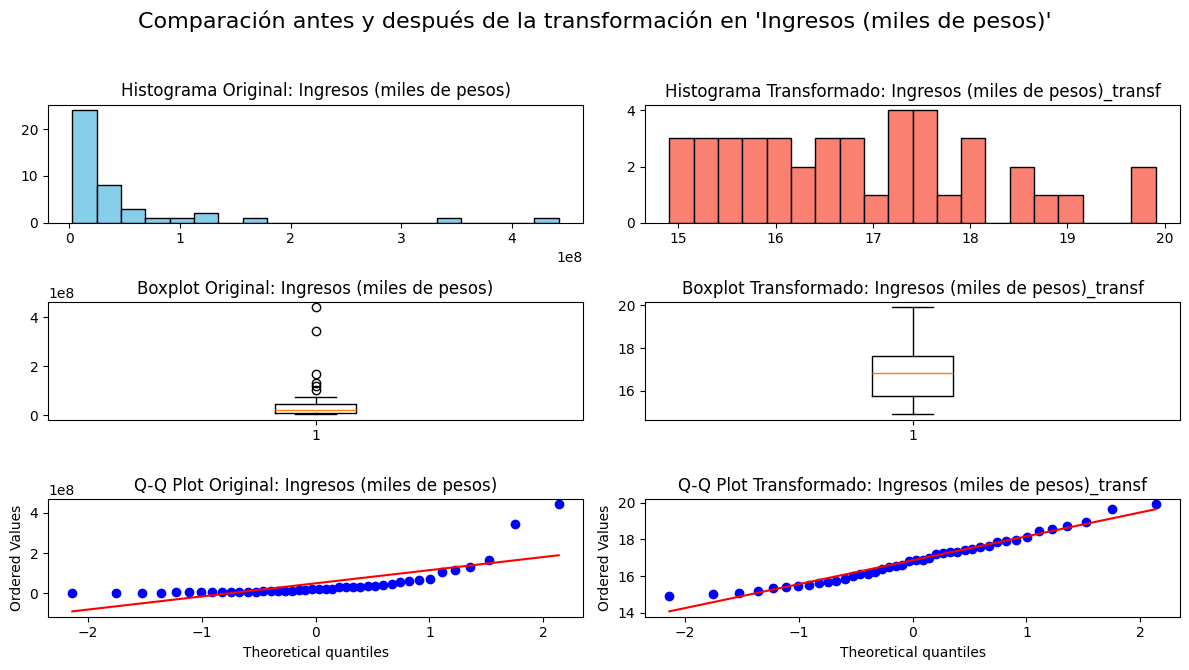

In [19]:
from functions import * # Importar todas las funciones del módulo functions.py
# Hacemos transformacion Logaritmica y Raiz Cuadrada, luego comparamos el antes y despues con tres tecnicas de visualización:
df_transformado = transformar_y_visualizar(df_internet_nacional, "Ingresos (miles de pesos)", 
                                             log_transform=True, sqrt_transform=False,
                                             mostrar_hist=True, mostrar_box=True, mostrar_qq=True)

In [ ]:
columnas_continuas = ["Velocidad (Mbps)"] # Lista de columnas para validar la medida estadística "skewness":

for col in columnas_continuas:
    if col in df_internet_Acc_vel_loc_sinrangos.columns:
        skew_val = df_internet_Acc_vel_loc_sinrangos[col].skew()
        print(f"{col}: skewness = {skew_val:.2f}")

In [ ]:
columnas_continuas = ["Tot_B_Ancha_Fija_x_Prov","Tot_DialUp_x_Prov","Tot_DialUp_+_B_Ancha_Fija_x_Prov"] # Lista de columnas para validar la medida estadística "skewness":

for col in columnas_continuas:
    if col in df_internet_Dial_BAf.columns:
        skew_val = df_internet_Dial_BAf[col].skew()
        print(f"{col}: skewness = {skew_val:.2f}")

In [ ]:
from functions import * # Importar todas las funciones del módulo functions.py
# Hacemos transformacion Logaritmica y Raiz Cuadrada, luego comparamos el antes y despues con tres tecnicas de visualización:
df_transformado = transformar_y_visualizar(df_internet_Dial_BAf, "Tot_B_Ancha_Fija_x_Prov", 
                                             log_transform=True, sqrt_transform=False,
                                             mostrar_hist=True, mostrar_box=True, mostrar_qq=True)
df_transformado = transformar_y_visualizar(df_internet_Dial_BAf, "Tot_DialUp_x_Prov", 
                                             log_transform=True, sqrt_transform=False,
                                             mostrar_hist=True, mostrar_box=True, mostrar_qq=True)
df_transformado = transformar_y_visualizar(df_internet_Dial_BAf, "Tot_DialUp_+_B_Ancha_Fija_x_Prov", 
                                             log_transform=True, sqrt_transform=False,
                                             mostrar_hist=True, mostrar_box=True, mostrar_qq=True)

Además de graficar la relación directa entre, por ejemplo, la velocidad y los accesos o la penetración por provincia y obtener la matriz de correlaciones, existen otras exploraciones y análisis de tendencias que pueden enriquecer el EDA:

6. **Visualización Geográfica (si es posible):**  
   - Si dispones de datos de localización, mapear las provincias con indicadores como accesos o velocidades, lo que puede ayudar a identificar patrones geográficos o diferencias regionales.

Además de graficar la relación directa entre, por ejemplo, la velocidad y los accesos o la penetración por provincia y obtener la matriz de correlaciones, existen otras exploraciones y análisis de tendencias que pueden enriquecer el EDA:

7. **Modelos de Regresión Exploratorios:**  
   - Ajustar modelos de regresión simples o múltiples para explorar qué variables (por ejemplo, la velocidad o el tipo de conexión) explican mejor la variabilidad en el número de accesos o en la penetración.

Estas exploraciones adicionales te ayudarán a comprender mejor las relaciones subyacentes en tus datos y a identificar posibles áreas de mejora o nuevas oportunidades de análisis para la estrategia de la empresa en el sector de telecomunicaciones.

Además de graficar la relación directa entre, por ejemplo, la velocidad y los accesos o la penetración por provincia y obtener la matriz de correlaciones, existen otras exploraciones y análisis de tendencias que pueden enriquecer el EDA:

1. **Análisis de Series Temporales:**  
   - Graficar la evolución de variables clave (velocidad, accesos, penetración) a lo largo del tiempo, usando "Año" y "Trimestre".  
   - Identificar tendencias, estacionalidad o cambios abruptos en el tiempo.

2. **Comparación por Categorías:**  
   - Utilizar boxplots o violin plots para comparar la distribución de variables numéricas (por ejemplo, accesos o velocidad) entre diferentes provincias o periodos.  
   - Analizar si existen diferencias significativas entre grupos (por ejemplo, comparar provincias de alta penetración versus baja penetración).

3. **Análisis Multivariado:**  
   - Realizar scatter plots con diferentes variables, añadiendo información adicional mediante el color o tamaño de los puntos (por ejemplo, usando "Periodo" o "Provincia" como dimensión adicional).  
   - Generar pair plots (gráficos de dispersión en matriz) para explorar las relaciones entre varias variables numéricas al mismo tiempo.

4. **Clusterización y Segmentación:**  
   - Aplicar técnicas de clustering (como k-means) para agrupar provincias o periodos según sus características (velocidad, accesos, penetración), lo que puede revelar patrones ocultos o segmentos de mercado.

5. **Análisis de Outliers y Distribución:**  
   - Más allá de las correlaciones, utilizar histogramas, boxplots y Q-Q plots para entender la distribución de cada variable, identificar outliers y evaluar la necesidad de transformaciones (por ejemplo, logarítmicas).

6. **Visualización Geográfica (si es posible):**  
   - Si dispones de datos de localización, mapear las provincias con indicadores como accesos o velocidades, lo que puede ayudar a identificar patrones geográficos o diferencias regionales.

7. **Modelos de Regresión Exploratorios:**  
   - Ajustar modelos de regresión simples o múltiples para explorar qué variables (por ejemplo, la velocidad o el tipo de conexión) explican mejor la variabilidad en el número de accesos o en la penetración.

Estas exploraciones adicionales te ayudarán a comprender mejor las relaciones subyacentes en tus datos y a identificar posibles áreas de mejora o nuevas oportunidades de análisis para la estrategia de la empresa en el sector de telecomunicaciones.

4. Conclusiones preliminares
	1.	Principales hallazgos
	    •	Provincias con mayor número de accesos.
	    •	Provincias con mayor velocidad media.
	    •	Evolución temporal de penetración, accesos, etc.
	2.	Problemas detectados
	    •	Columnas con muchos nulos.
	    •	Posibles valores atípicos o inconsistentes.
	    •	Variables que no aportan información o que podrían fusionarse.
	3.	Decisiones para el Dashboard
	    •	Identificar qué métricas se van a mostrar (velocidad, accesos, penetración, ingresos, etc.).
	    •	Definir filtros relevantes (por provincia, año, trimestre).

In [ ]:
asd

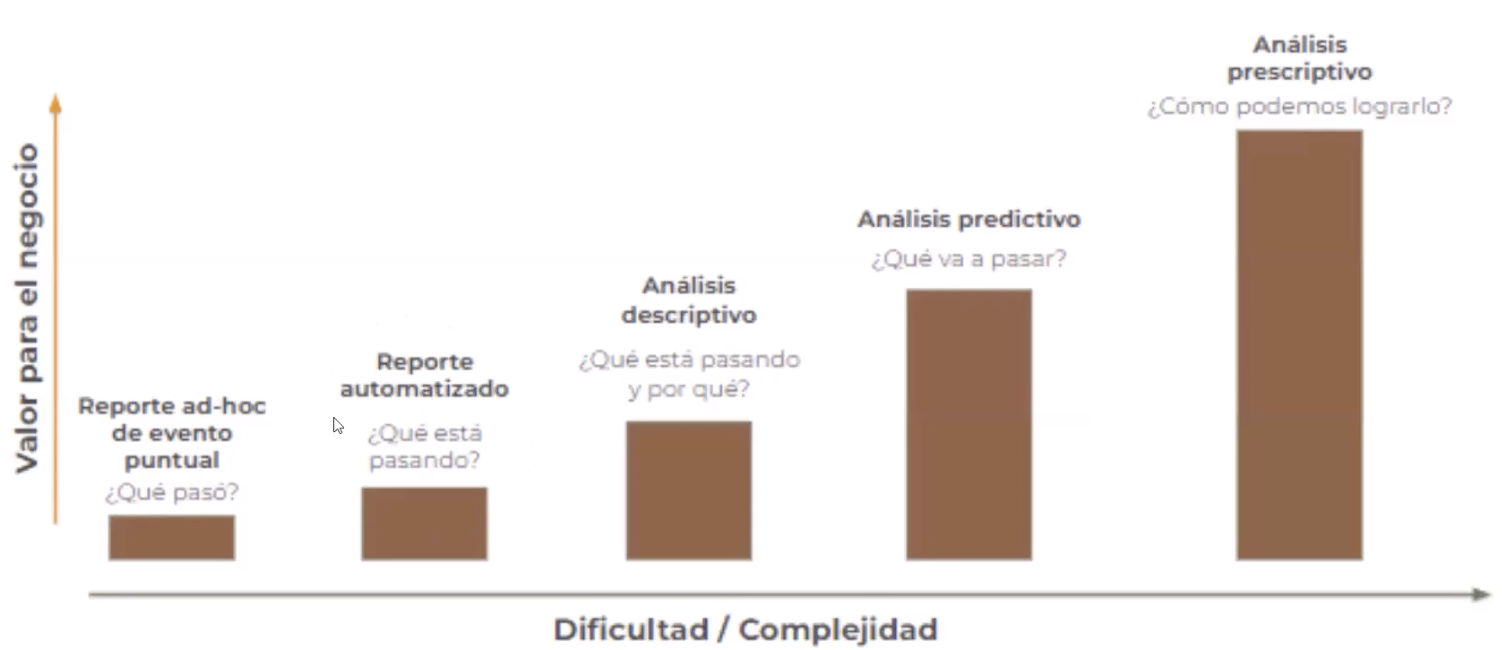

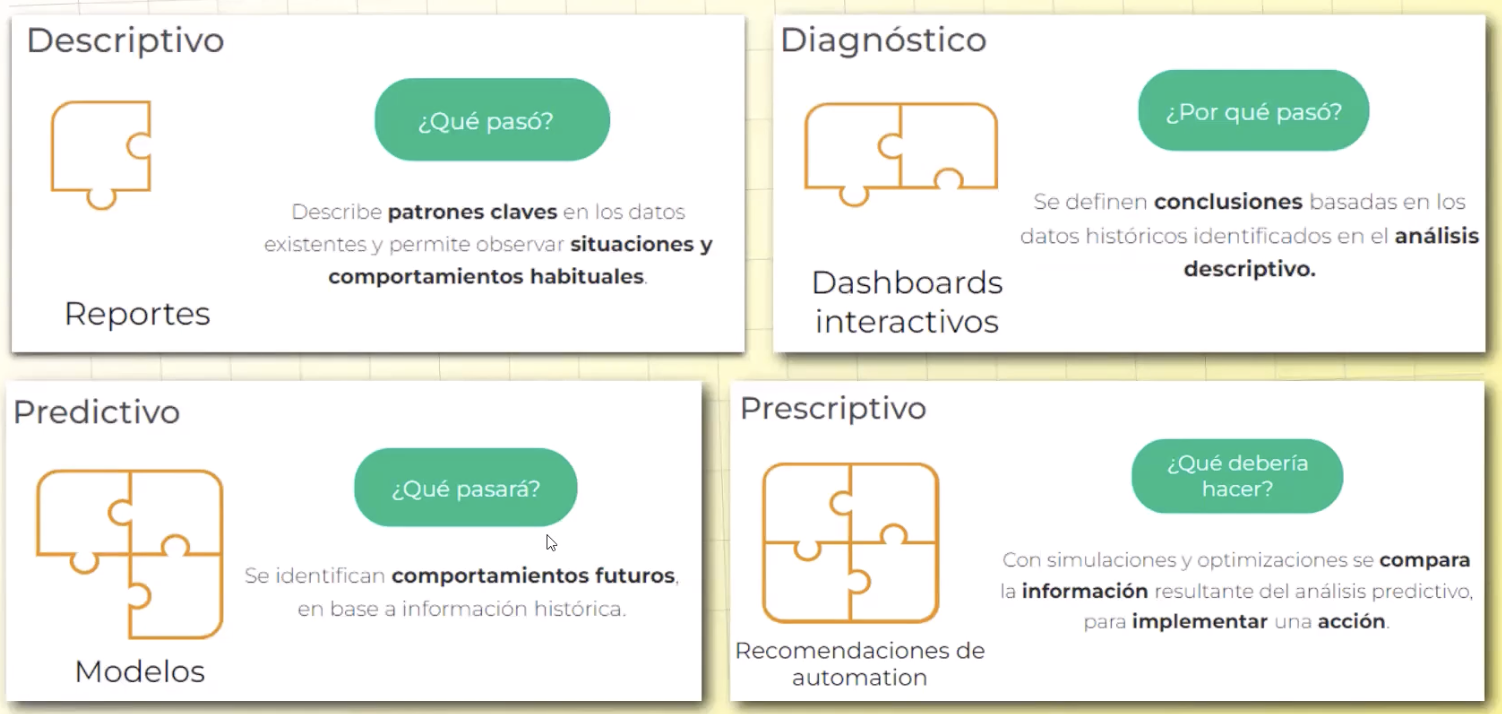